In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import sys
from keras.layers.normalization import BatchNormalization
import pandas as pd

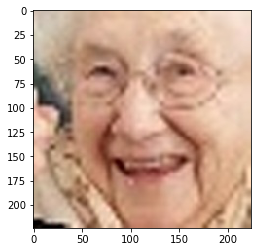

In [9]:
## training圖片顯示
img = plt.imread('train/0_3.jpg')
img.shape
plt.imshow(img)

In [4]:
## 對training data 分類

In [5]:
path = "train"
dirs = os.listdir(path) #顯示內部檔案名稱
train_data_shape = len(dirs) #訓練資料筆數

In [6]:
## 將檔案名稱變為list
aa = []
for file in dirs:
     aa.append(file)
#print(aa)

In [7]:
## 抓取list的字串
temp_id = []
temp_cat = []
for j in range(train_data_shape):
    b = aa[j].split('.') #先根據點先切開
    c = b[0].split('_') #再根據底線切開
    temp_id.append(c[0]) #抓取檔案id
    temp_cat.append(c[1]) #抓取檔案分類

In [8]:
#定義若分類是0,1,2,3則將圖片分類到所屬的檔案

In [9]:
#建立traning資料集
path = './training'
os.makedirs(path)

In [10]:
for k in range(4):
    path = './training/'+str(k)
    os.makedirs(path)

In [11]:
for i in range(train_data_shape):
    if (temp_cat[i] == '0'):
        img = plt.imread('train/'+ str(temp_id[i]) + '_0.jpg')
        cv2.imwrite('training/0/'+str(i)+'.jpg',cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) #plt跟cv2的channel不同
    elif (temp_cat[i] == '1'):
        img = plt.imread('train/'+str(temp_id[i]) + '_1.jpg')
        cv2.imwrite('training/1/'+str(i)+'.jpg',cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    elif (temp_cat[i] == '2'):
        img = plt.imread('train/'+ str(temp_id[i]) + '_2.jpg')
        cv2.imwrite('training/2/'+str(i)+'.jpg',cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    else:
        img = plt.imread('train/'+str(temp_id[i]) + '_3.jpg')
        cv2.imwrite('training/3/'+str(temp_id[i])+'.jpg',cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [1]:
#建立模型
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

Using TensorFlow backend.


In [25]:
model = Sequential(name = 'model1')
model.add(Conv2D(filters = 64,kernel_size = (3,3),input_shape = (64,64,3),padding='same',activation='relu'))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding='same',activation='relu'))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size  = (2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(units = 128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 4,activation = 'softmax'))

In [26]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        36928

In [27]:
#產生器
from keras.preprocessing.image import ImageDataGenerator

In [29]:
#影像增強
#rotation_range在角度(0,15)中隨機旋轉
#width_shift_range=0.1,height_shift_range=0.1水平移動或垂直移動
#zoom_range長或寬進行放大
#horizontal_flip = True隨機對圖片進行水平翻轉
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=20,shear_range = 0.2,zoom_range = 0.2,
                                   horizontal_flip = True,width_shift_range=0.1,height_shift_range=0.1,
                                   validation_split=0.25)
# train_datagen = ImageDataGenerator(vertical_flip=True)
training_set = train_datagen.flow_from_directory('training/',target_size=(64,64),color_mode="rgb",batch_size=15,class_mode='categorical')

Found 542 images belonging to 4 classes.


In [46]:
#影像增強例子

In [10]:
# from keras.preprocessing.image import img_to_array
# data = img_to_array(img)
# samples = np.expand_dims(data, axis=0)
# samples.astype('float32')

array([[[[209., 193., 180.],
         [209., 193., 180.],
         [208., 192., 179.],
         ...,
         [243., 228., 209.],
         [242., 227., 208.],
         [242., 227., 208.]],

        [[209., 193., 180.],
         [209., 193., 180.],
         [208., 192., 179.],
         ...,
         [242., 227., 208.],
         [242., 227., 208.],
         [242., 227., 208.]],

        [[210., 194., 181.],
         [210., 194., 181.],
         [209., 193., 180.],
         ...,
         [242., 227., 208.],
         [242., 227., 208.],
         [242., 227., 208.]],

        ...,

        [[  5.,   1.,   0.],
         [  5.,   1.,   0.],
         [  7.,   3.,   0.],
         ...,
         [167., 132., 100.],
         [168., 133., 101.],
         [167., 132., 100.]],

        [[  8.,   3.,   0.],
         [  8.,   3.,   0.],
         [ 10.,   5.,   1.],
         ...,
         [164., 129.,  97.],
         [165., 130.,  98.],
         [165., 129.,  97.]],

        [[  7.,   2.,   0.],
       

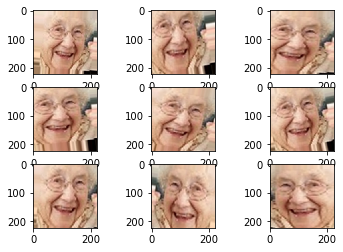

In [14]:
# datagen = ImageDataGenerator(rotation_range=15,shear_range = 0.2,zoom_range = 0.2,
# horizontal_flip = True,width_shift_range=0.1,height_shift_range=0.1)
# it = datagen.flow(samples, batch_size=1)

# for i in range(9):
#     plt.subplot(331 + i)
#     batch = it.next()
#     image = batch[0].astype('uint32')
#     plt.imshow(image)
# plt.show()

In [30]:
#validation geneator
validation_set = train_datagen.flow_from_directory('training/',target_size=(64,64),color_mode="rgb",batch_size=15,class_mode='categorical',subset='validation')

Found 134 images belonging to 4 classes.


In [31]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# earlystop = EarlyStopping(patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0)
callbacks = [learning_rate_reduction]

In [118]:
#配適模型

In [32]:
history = model.fit_generator(
    training_set,
    steps_per_epoch=435//15,
    epochs=100,
    validation_data=validation_set,
    validation_steps=107//15,callbacks=callbacks)

Epoch 1/100
29/29 [==============================] - 17s 600ms/step - loss: 1.4974 - accuracy: 0.4929 - val_loss: 1.1073 - val_accuracy: 0.4952
Epoch 2/100
29/29 [==============================] - 17s 570ms/step - loss: 1.4520 - accuracy: 0.5149 - val_loss: 1.3603 - val_accuracy: 0.3173
Epoch 3/100
29/29 [==============================] - 17s 589ms/step - loss: 1.2601 - accuracy: 0.5024 - val_loss: 2.4257 - val_accuracy: 0.2212
Epoch 4/100
29/29 [==============================] - 18s 637ms/step - loss: 1.0782 - accuracy: 0.5711 - val_loss: 2.2089 - val_accuracy: 0.2692

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/100
29/29 [==============================] - 18s 614ms/step - loss: 1.0940 - accuracy: 0.5853 - val_loss: 2.9920 - val_accuracy: 0.2286
Epoch 6/100
29/29 [==============================] - 19s 642ms/step - loss: 1.0812 - accuracy: 0.5995 - val_loss: 2.8203 - val_accuracy: 0.2692
Epoch 7/100
29/29 [==============================] - 17

29/29 [==============================] - 16s 541ms/step - loss: 1.0178 - accuracy: 0.6430 - val_loss: 0.4783 - val_accuracy: 0.7404
Epoch 100/100
29/29 [==============================] - 16s 566ms/step - loss: 0.8168 - accuracy: 0.6460 - val_loss: 0.5869 - val_accuracy: 0.7048

Epoch 00100: ReduceLROnPlateau reducing learning rate to 7.450580950807417e-12.


In [ ]:
#匯出模型的訓練及驗證資料結果

In [33]:
#draw accuracy and loss plot
from matplotlib.pyplot import figure
def plot_hist_loss(history):
  #  figure(figsize=(10,4))
    #plt.ylim(0,8.0)
    plt.plot(history.history['loss'],color='b',label= 'training loss')
    plt.plot(history.history['val_loss'],color='r',label = 'val loss')
    plt.ylabel('loss')
    plt.legend(loc = 'upper right')
def plot_hist_acc(history):
  #  figure(figsize=(10,4))
    plt.plot(history.history['accuracy'],color='b',label= 'training acc')
    plt.plot(history.history['val_accuracy'],color='r',label = 'val acc')
   # plt.ylim(0.2,1.0)
    plt.ylabel('accracy')
    plt.legend(loc = 'lower right')

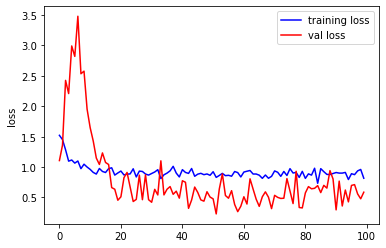

In [34]:
plot_hist_loss(history)

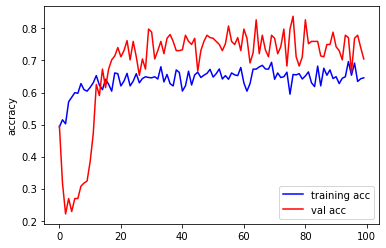

In [35]:
plot_hist_acc(history)

In [36]:
#模型權數儲存
model.save('model1.h5')
model.save_weights("model1.weight")

In [ ]:
#測試資料集

In [86]:
# test_filenames = os.listdir("test")
# test_df = pd.DataFrame({
#     'filename': test_filenames
# })
# nb_samples = test_df.shape[0]

In [89]:
#testing generator
# test_gen = ImageDataGenerator(rescale=1./255)
# test_set = test_gen.flow_from_dataframe(
#     test_df, 
#     "test/", 
#     x_col='filename',
#     y_col=None,
#     class_mode=None,
#     target_size=(64,64),
#     color_mode="rgb",
#     batch_size=1,
#     shuffle=False
# )

Found 96 validated image filenames.


In [90]:
## predict
# predict = model.predict_generator(test_set, steps=np.ceil(nb_samples))
# predict

array([[6.21761210e-05, 2.17735942e-06, 3.36053967e-02, 9.66330290e-01],
       [1.55818896e-08, 3.17290361e-11, 2.65872339e-04, 9.99734104e-01],
       [1.41666655e-03, 8.37402622e-05, 6.20796323e-01, 3.77703339e-01],
       [4.73020375e-02, 8.18378747e-01, 1.32152900e-01, 2.16629566e-03],
       [8.74263421e-03, 8.41740131e-01, 1.48509383e-01, 1.00784458e-03],
       [5.27597922e-06, 5.79884472e-05, 9.74991679e-01, 2.49450542e-02],
       [1.16902113e-01, 6.37916446e-01, 2.34000996e-01, 1.11804120e-02],
       [5.44808917e-02, 1.87530711e-01, 7.20605671e-01, 3.73827480e-02],
       [1.55544525e-03, 5.30964792e-01, 4.62227941e-01, 5.25186118e-03],
       [6.18437582e-07, 1.27087906e-03, 9.94901896e-01, 3.82657233e-03],
       [1.52764231e-01, 5.40807992e-02, 3.77042979e-01, 4.16112036e-01],
       [4.62731036e-13, 1.00000000e+00, 5.15281231e-13, 8.48170321e-18],
       [9.05686524e-03, 8.17960620e-01, 1.69779480e-01, 3.20302066e-03],
       [1.37571635e-13, 1.00000000e+00, 5.81783536e

In [91]:
test_df['category'] = np.argmax(predict, axis=-1)
test_df['category']

0     3
1     3
2     2
3     1
4     1
     ..
91    1
92    1
93    3
94    2
95    0
Name: category, Length: 96, dtype: int64

In [92]:
## output the results
# result = './outcome.csv'
# dataframe_sample = pd.DataFrame.from_dict(test_df)
# dataframe_sample.to_csv(result,index=False)